#### Numpy

https://docs.scipy.org/doc/

In [4]:
import numpy as np

In [14]:
# Short cut 1:  press shift + tab inside any object to see its documentation. or type ?object
# x = np.array([1,2,3],[5,2,3])  This will cause an error
x = np.array([[1,2,3],[7,4,2]])
print(f"x:\n{x}")
print()
print(x.shape)
print()
print(x.flatten('A'))

x:
[[1 2 3]
 [7 4 2]]

(2, 3)

[1 2 3 7 4 2]


#### SciPy

In [15]:
from scipy import sparse

In [20]:
#Create an identity matrix or Create a 2d numpy array with 1's in the diagonal
eye = np.eye(4)
print(f"NumPy array:\n{eye}")

NumPy array:
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [25]:
# Convert the Numpy to SciPy sparse matrix in CSR format
#this helps with storing only non zero entries which help with memeory
print(sparse.csr_matrix(eye))
print()
print(sparse.csr_matrix(x))

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0

  (0, 0)	1
  (0, 1)	2
  (0, 2)	3
  (1, 0)	7
  (1, 1)	4
  (1, 2)	2


In [29]:
#Method number 2
data = np.ones(4)
row_indices = np.arange(4)
column_indices = np.arange(4)
identity = sparse.coo_matrix((data,(row_indices,column_indices)))
print(identity)


  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [38]:
#  To take it back to its sparse format 
print(identity.toarray())

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


#### matplotlib

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

In [69]:
# given [-5,5], n = 100 
#[-5,5]
x = np.linspace(-5,5,100)
#first 7
print(x[0:7])

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939]


In [70]:
# no you can create any function on top of the above sequence
y = np.cosh(x)

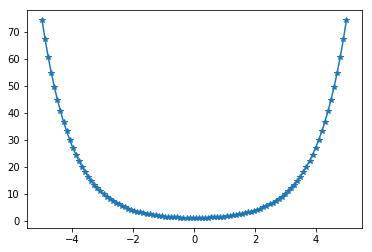

In [71]:
#lets plot this
plt.plot(x,y, marker='*')

#### Pandas

for data wrangling and analysis. main object is a data frame similar to an excel spreadsheet. 

In [103]:
import pandas as pd

# create your first data frame
# first creating a dictionary key-value dataset

my_data = {'city':['San Francisco','Kansas','Irvine', 'Newport Beach', 'Texas'],'temperature':[25,65,74,68,34],'population_type':['large','medium','medium','medium','large']}

In [104]:
my_first_dataframe = pd.DataFrame(my_data)

In [105]:
my_first_dataframe

,city,population_type,temperature
0,San Francisco,large,25
1,Kansas,medium,65
2,Irvine,medium,74
3,Newport Beach,medium,68
4,Texas,large,34


In [106]:
#select all cities with temperature greater than 50
my_first_dataframe[my_first_dataframe.temperature > 50].city

1           Kansas
2           Irvine
3    Newport Beach
Name: city, dtype: object

## First Example California_housing_dataset

### First look of data

#### A First Application: Predicting average housing prices in california
![sepal_petal](images/cal_housing_pic.jpg)
#### Meet the data

In [123]:
from sklearn.datasets import california_housing


In [124]:
california_housing_dataset = california_housing

In [125]:
# return an Bunch object similar to a dict with key/value pairs. 
california_housing_dataset

<module 'sklearn.datasets.california_housing' from '/Users/siavashmortezavi/anaconda3/lib/python3.6/site-packages/sklearn/datasets/california_housing.py'>

In [128]:
california_housing_dataset = california_housing_dataset.fetch_california_housing()

In [130]:
california_housing_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [134]:
california_housing_dataset['DESCR']

'California housing dataset.\n\nThe original database is available from StatLib\n\n    http://lib.stat.cmu.edu/\n\nThe data contains 20,640 observations on 9 variables.\n\nThis dataset contains the average house value as target variable\nand the following input variables (features): average income,\nhousing average age, average rooms, average bedrooms, population,\naverage occupation, latitude, and longitude in that order.\n\nReferences\n----------\n\nPace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,\nStatistics and Probability Letters, 33 (1997) 291-297.\n\n'

In [142]:
california_housing_dataset['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [147]:
(california_housing_dataset['target']).shape, type(california_housing_dataset['target'])

((20640,), numpy.ndarray)

In [148]:
california_housing_dataset['data'].shape, type(california_housing_dataset['data'])

((20640, 8), numpy.ndarray)

In [153]:
#since no taget name was given in the dictionary
#lets create one and take alook at our taget
target_name = "average_house_value"
print(california_housing_dataset['target'])
print()
#note the acutal house prices are * 100,000
print(california_housing_dataset['target']*100000)

[ 4.526  3.585  3.521 ...,  0.923  0.847  0.894]

[ 452600.  358500.  352100. ...,   92300.   84700.   89400.]


### Dividing data into Training and Testing

We will divide our data into training and test set so that we can see how well our trained data on the training set will perform on the test set.
this is due to the fact that we do not want to overfit our data. In future problem sets we will add validation set as well to further tune our parameters and reduce overfitting.  (getting ahead of ourselves).

In [155]:
# to achieve this we will use sciki-learns built in split function 
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test , y_train, y_test = \
train_test_split(california_housing_dataset['data']\
                 ,california_housing_dataset['target'],test_size=.2, random_state=0)

In [162]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

### Visualize and look at our data

In [175]:
# let's look at our training data with a data frame which is great for
# structured data.
housing_dataframe = pd.DataFrame(X_train,columns=\
                    california_housing_dataset['feature_names'])
housing_dataframe[:4]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.2386,6.0,7.723077,1.169231,228.0,3.507692,33.83,-117.55
1,4.3898,52.0,5.326622,1.100671,1485.0,3.322148,37.73,-122.44
2,3.9333,26.0,4.668478,1.046196,1022.0,2.777174,33.83,-118.00
3,1.4653,38.0,3.383495,1.009709,749.0,3.635922,34.01,-118.26


In [177]:
# let's look at some stats
housing_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.876298,28.619065,5.432607,1.096174,1425.437742,3.030518,35.624783,-119.563008
std,1.906783,12.600999,2.523415,0.489529,1143.062756,6.441340,2.136552,2.005251
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000
25%,2.566625,18.000000,4.447644,1.005760,785.000000,2.428016,33.930000,-121.800000
50%,3.548500,29.000000,5.234243,1.048720,1166.000000,2.817937,34.250000,-118.490000
75%,4.747575,37.000000,6.059008,1.100000,1724.000000,3.283243,37.710000,-118.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,599.714286,41.950000,-114.310000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c24168588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c29476400>]], dtype=object)

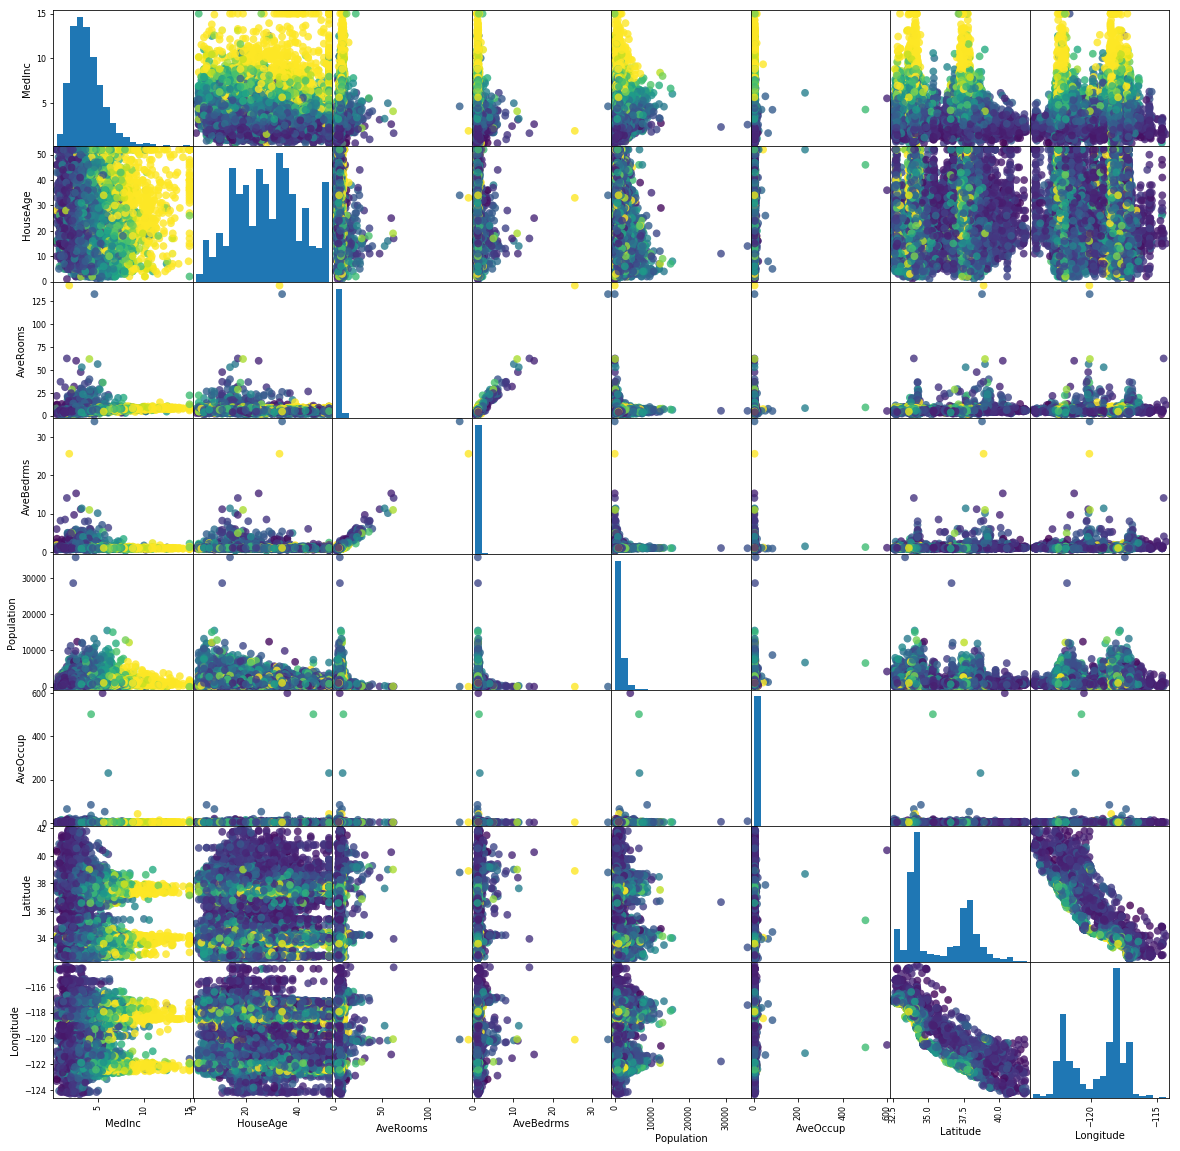

In [181]:
#look at a scatter matrix
pd.plotting.scatter_matrix(housing_dataframe, c=y_train, figsize=(20,20), marker = 'o', hist_kwds={'bins':20}, s =60, alpha = .8)

There seems to be some seperations between the 8 classes so a K-nearest neighbros algorithm might be able to give a us a good starting point on our data. 

### Build our first Model: Linear Regression

In [197]:
# we have created a knn object we can use fit next to fit our model. 
from sklearn.linear_model import LinearRegression
Linear = LinearRegression()

In [198]:
Linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Making predictions and evaluating the model

In [203]:
prediction = Linear.predict(X_test)
print(f'the prediction for our housing prices are:\n {prediction}')

the prediction for our housing prices are:
 [ 2.28110738  2.79009128  1.90332794 ...,  0.8418697   2.7984953
  2.21779325]


In [204]:
#scikit error score
Linear.score(X_test,y_test)

0.5943232652466176

In [206]:
#RMSE
np.mean(np.square(y_test - prediction))

# wich means on average we were off by roghly 


0.52898416703672435

In [209]:
# wich means on average we were off by roughly 
np.mean(np.square(y_test - prediction)) * 100000


52898.416703672432

Lets improve a bit on this and use a random forest regressor we will get to this more later but just to show you the power of this technique. 

In [220]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1)

In [221]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [222]:
prediction = rf.predict(X_test)

In [223]:
#RMSE
np.mean(np.square(y_test - prediction))



0.29380590351962083

In [224]:
# wich means on average we were off by roughly 
np.mean(np.square(y_test - prediction)) * 100000



29380.590351962084

### Conclusion and summary

We learned how to look at data, visualize it, get it ready for machine learning, apply two ml algorithms and evaluated their performance.